<a href="https://colab.research.google.com/github/Vidhdhi/API/blob/main/Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of duplicate rows: 0


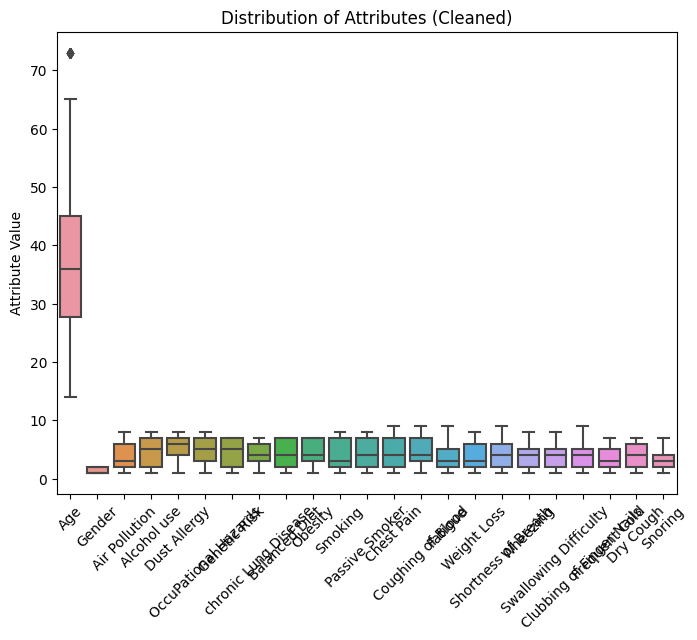

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/cancer patient data sets.csv')

data_cleaned = data.dropna()


duplicate_rows = data_cleaned[data_cleaned.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned.drop(columns=['Level']))
plt.title('Distribution of Attributes (Cleaned)')
plt.ylabel('Attribute Value')
plt.xticks(rotation=45)
plt.show()

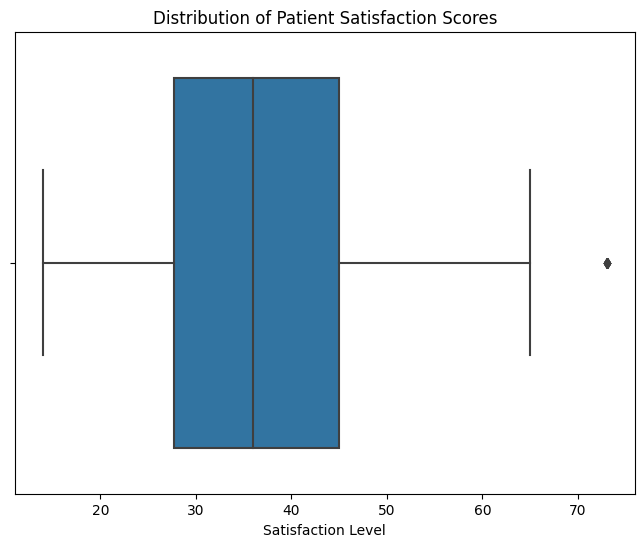

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=data_cleaned)
plt.title('Distribution of Patient Satisfaction Scores')
plt.xlabel('Satisfaction Level')
plt.show()

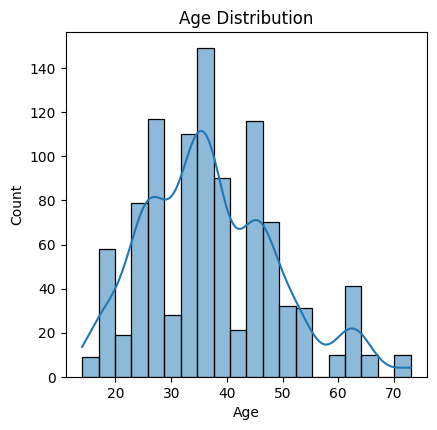

In [36]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(data=data_cleaned, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

In [23]:
print(data.head())
print(data.info())

   Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           1   33       1              2            4             5   
1          10   17       1              3            1             5   
2         100   35       1              4            5             6   
3        1000   37       1              7            7             7   
4         101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4       

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer



In [6]:
data['Patient Id'] = data['Patient Id'].astype(str).str.replace('P', '', regex=False)
data['Patient Id'] = pd.to_numeric(data['Patient Id'], errors='coerce')



In [7]:
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Level'] = data['Level'].map(level_mapping)



In [8]:
X = data.drop(columns=['Level'])
y = data['Gender']



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [10]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



In [11]:
print(y_train.value_counts())


1    430
2    270
Name: Gender, dtype: int64


In [12]:
model = LinearRegression()
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.397697178029712e-29
R-squared: 1.0


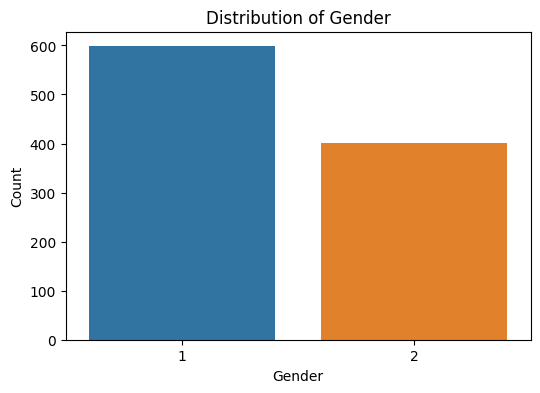

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

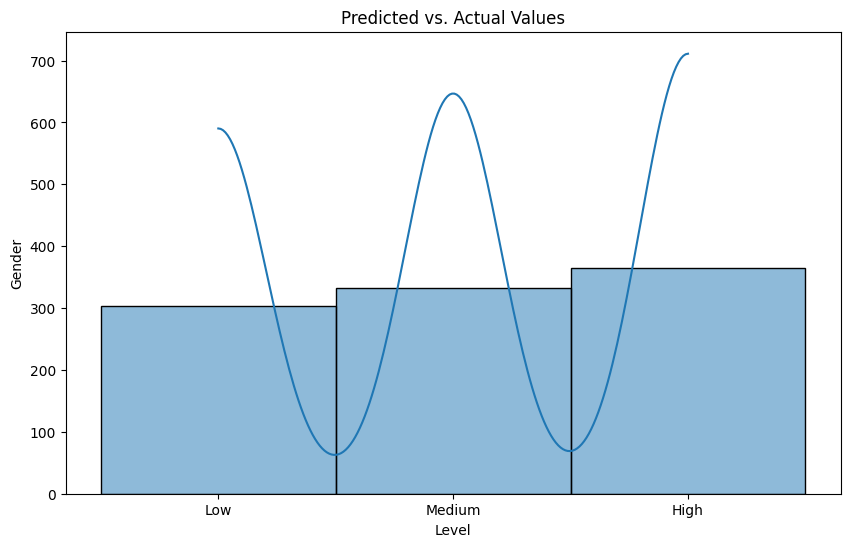

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='Level', bins=20, kde=True)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Level')
plt.ylabel('Gender')
plt.show()

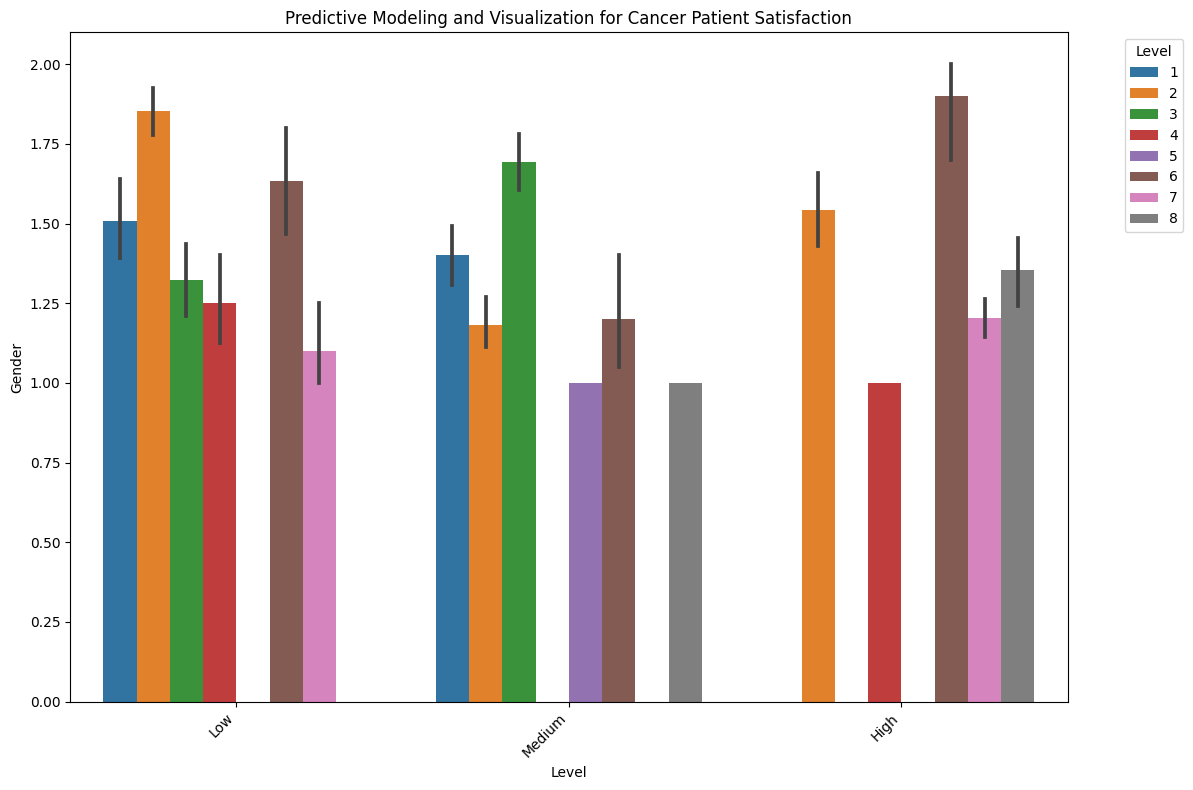

In [22]:
plt.figure(figsize=(12, 8))

sns.barplot(data=data_cleaned, x='Level', y='Gender',
hue='Smoking')
plt.xticks(rotation=45, ha='right')
plt.title('Predictive Modeling and Visualization for Cancer Patient Satisfaction')
plt.xlabel('Level')
plt.ylabel('Gender')
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-29-b2d8b3dd7465>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


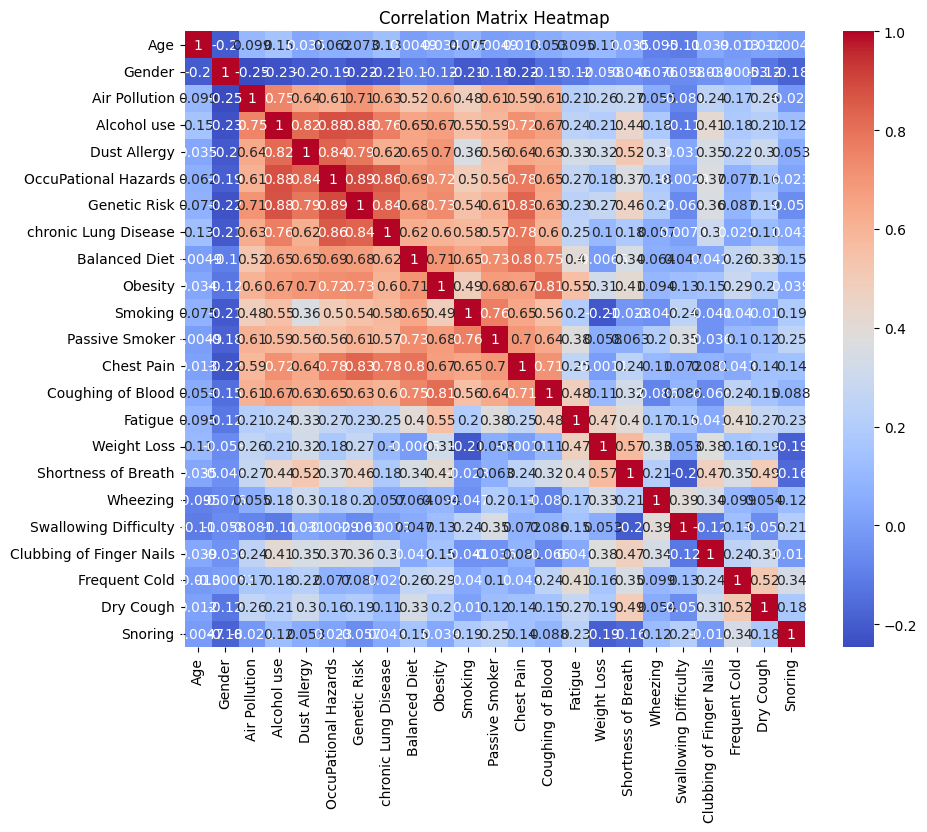

In [29]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


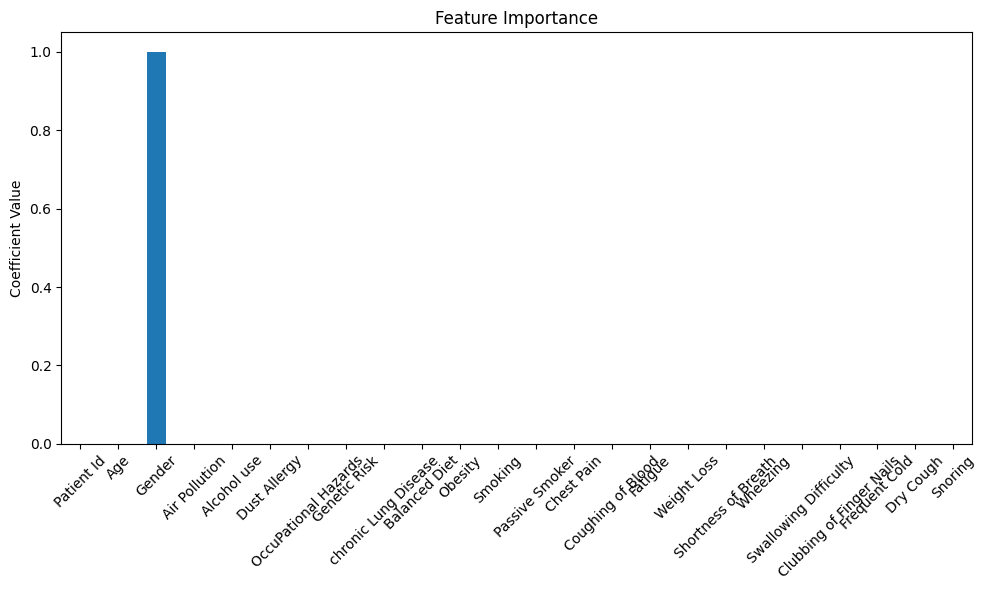

In [31]:
plt.figure(figsize=(10, 6))
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

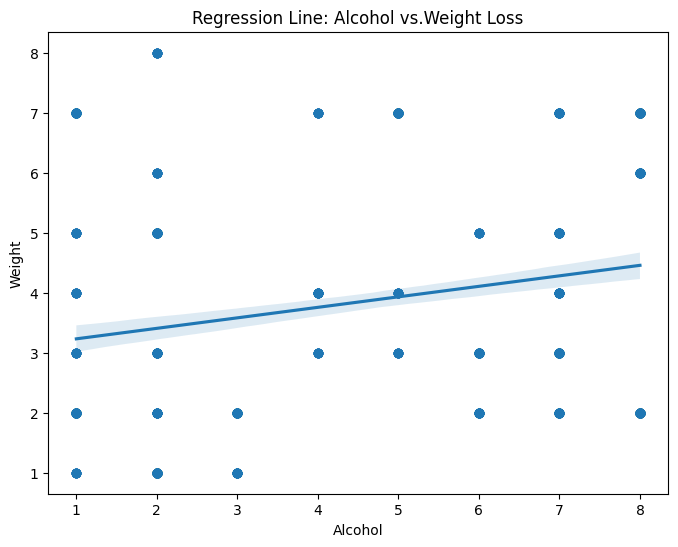

In [37]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Alcohol use', y='Weight Loss', data=data_cleaned)
plt.title('Regression Line: Alcohol vs.Weight Loss')
plt.xlabel('Alcohol')
plt.ylabel('Weight')
plt.show()